In [1]:
import os
import sys
sys.path.insert(0, "../../")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src.text.epu import EPU

In [2]:
parent_dirs = sys.path[0] + "data/text/"
country_dirs = [
    parent_dirs + country for country in os.listdir(parent_dirs)
    if country != ".DS_Store" and "marshall_islands" not in country
]
output_dir = sys.path[0] + "outputs/text/"

In [3]:
country = country_dirs[3]
country_name = country.split("/")[-1]
news_dirs = [
    f"{country}/{file}" for file in os.listdir(country) if "news" in file
    and "ner" not in file
]

,url,news,tags,date,ym,econ,policy,uncertain,epu


In [38]:
for name, raw in e.raw_files:
    interest = raw[(raw.date >= "2023-05-01") & (raw.date <= "2023-05-31") & (raw.epu == True)]
    print(interest.url.tolist())

['https://www.sibconline.com.sb/pm-sogavare-leaves-for-south-korea-pif-summit/', 'https://www.sibconline.com.sb/japan-to-assist-solomon-islands-with-uxo-removal/', 'https://www.sibconline.com.sb/solomon-islands-leads-the-pacific-on-soe-profitability-adb-report/', 'https://www.sibconline.com.sb/food-safety-training-ends-in-honiara-with-demands-for-more-to-enhance-work-of-food-processors-and-exporters/']
[]
[]
['https://www.solomontimes.com/news/sogavare-attends-south-koreapif-summit/12604', 'https://www.solomontimes.com/news/climate-budget-tagging-reforms-initiated/12597', 'https://www.solomontimes.com/news/commonwealth-health-ministers-pledge-to-work-together/12589', 'https://www.solomontimes.com/news/japan-to-support-uxo-removal/12573']
['https://theislandsun.com.sb/si-makes-progress/']
['https://www.solomonstarnews.com/pm-sogavare-leaves-for-south-korea-pif-summit/', 'https://www.solomonstarnews.com/japan-to-aid-si-with-uxo-removal/', 'https://www.solomonstarnews.com/minister-ramofaf

In [36]:
excl_urls

['https://www.rnz.co.nz/international/pacific-news/419395/solomons-backs-vice-chancellor-s-suspension',
 'https://www.rnz.co.nz/international/pacific-news/331866/solomons-working-on-new-climate-change-legislation',
 'https://www.rnz.co.nz/international/pacific-news/275667/solomons-told-to-reduce-risk-to-disaster',
 'https://theislandsun.com.sb/get-to-know-of-disaster/',
 'https://theislandsun.com.sb/mps-to-get-extra-4-5m/',
 'https://theislandsun.com.sb/climate-finance-roadmap-launched/',
 'https://theislandsun.com.sb/gizo-market-vendors-undergo-disaster-resilience-training/',
 'https://theislandsun.com.sb/13-new-officers-to-join-si-customs/',
 'https://theislandsun.com.sb/covid-19-awareness-in-malaita-continues/',
 'https://theislandsun.com.sb/malaita-plans-to-deal-with-outbreak-in-the-province/',
 'https://theislandsun.com.sb/no-lockdown-for-auki/',
 'https://theislandsun.com.sb/contact-tracing-team-to-leave-for-south-malaita-east-areare-following-contact-with-mv-awka/',
 'https://th

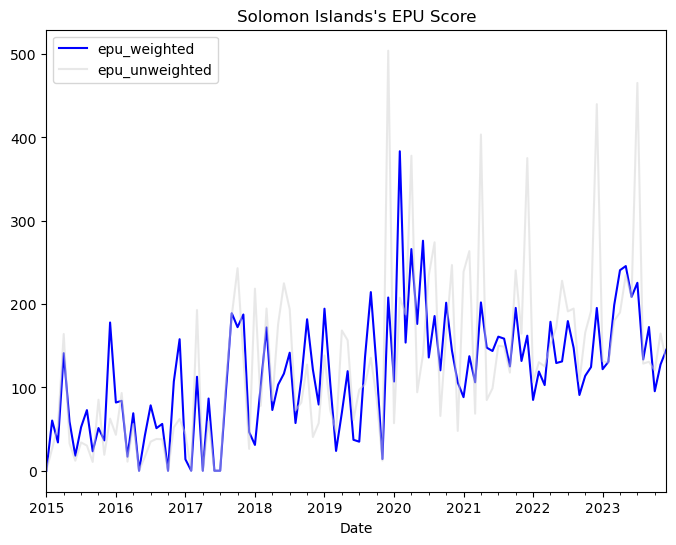

In [11]:
for country in country_dirs[3:4]:
    country_name = country.split("/")[-1]
    news_dirs = [
        f"{country}/{file}" for file in os.listdir(country) if "news" in file
        and "ner" not in file
    ]
    
    ner_files = [f"{country}/{file}" for file in os.listdir(country) if "ner" in file]

    excl_urls = []
    for ner_file in ner_files:
        ner_df = pd.read_csv(ner_file)
        for url, ner in zip(ner_df["url"], ner_df["ner"]):
            if "risk" in str(ner).lower():
                excl_urls.append(url)
    
    e = EPU(news_dirs, cutoff="2020-12-31", non_epu_urls=excl_urls)
    e.get_epu_category(subset_condition="date >= '2015-01-01' and date < '2024-01-01'")
    e.get_count_stats()
    e.calculate_epu_score()
    
    epu_stats = e.epu_stats
    fig, ax = plt.subplots(figsize=(8, 6))
    epu_stats.plot(x="date", y="epu_weighted", color="blue", ax=ax)
    epu_stats.plot(x='date', y="epu_unweighted", color="lightgray", alpha=0.5, ax=ax)
    
    title = " ".join(n[0].upper() + n[1:] for n in country_name.split("_"))
    ax.set_title(f"{title}'s EPU Score")
    ax.set_xlabel("Date")
    
#     saved_folder = output_dir + f"{country_name}/epu/"
#     fig.savefig(saved_folder + f"{country_name}_epu.png", dpi=400)
    
#     epu_stats.to_csv(saved_folder + f"{country_name}_epu.csv", encoding="utf-8")